Breast cancer detection. A SVM application.

Importing and preparing the data set

In [1]:
# We will use the following libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()
data_breast = pd.read_csv('data-breast-cancer-wisconsin.data', 
                 header=None)
# Show the first 25 rows
data_breast.head(5)

Saving data-breast-cancer-wisconsin.data to data-breast-cancer-wisconsin (3).data


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Rename the attributes
d = {'id_number': data_breast[0],
     'Thickness': data_breast[1], 
     'Cell Size' : data_breast[2],
     'Cell Shape':data_breast[3],
     'Marginal Adhesion':data_breast[4],
     'Epithelial Size':data_breast[5],
     'Bare Nuclei':data_breast[6],
     'Bland Chromatin':data_breast[7],
     'Normal Nucleoli':data_breast[8],
     'Mitoses':data_breast[9],
     'Diagnosis': data_breast[10]}
df = pd.DataFrame(data=d)
df.head(5)

,id_number,Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_number          699 non-null    int64 
 1   Thickness          699 non-null    int64 
 2   Cell Size          699 non-null    int64 
 3   Cell Shape         699 non-null    int64 
 4   Marginal Adhesion  699 non-null    int64 
 5   Epithelial Size    699 non-null    int64 
 6   Bare Nuclei        699 non-null    object
 7   Bland Chromatin    699 non-null    int64 
 8   Normal Nucleoli    699 non-null    int64 
 9   Mitoses            699 non-null    int64 
 10  Diagnosis          699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
# Re-scoring the missing data labeled by '?' to 'NaN'
df=df.replace('?', np.nan)
df.head(5)

,id_number,Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df.isna().sum()

id_number             0
Thickness             0
Cell Size             0
Cell Shape            0
Marginal Adhesion     0
Epithelial Size       0
Bare Nuclei          16
Bland Chromatin       0
Normal Nucleoli       0
Mitoses               0
Diagnosis             0
dtype: int64

In [8]:
# Removing the 16 rows with missing data (all of them belonging to Bare Nuclei column)
df=df.dropna()
df

,id_number,Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [9]:
df.isna().sum()

id_number            0
Thickness            0
Cell Size            0
Cell Shape           0
Marginal Adhesion    0
Epithelial Size      0
Bare Nuclei          0
Bland Chromatin      0
Normal Nucleoli      0
Mitoses              0
Diagnosis            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_number          683 non-null    int64 
 1   Thickness          683 non-null    int64 
 2   Cell Size          683 non-null    int64 
 3   Cell Shape         683 non-null    int64 
 4   Marginal Adhesion  683 non-null    int64 
 5   Epithelial Size    683 non-null    int64 
 6   Bare Nuclei        683 non-null    object
 7   Bland Chromatin    683 non-null    int64 
 8   Normal Nucleoli    683 non-null    int64 
 9   Mitoses            683 non-null    int64 
 10  Diagnosis          683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [0]:
# Re-scoring the Diagnosis values 2 to 0 (Benign), 4 to 1 (Malign)
df['Diagnosis']=(df['Diagnosis']/2)-1

In [12]:
df

,id_number,Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,0.0
1,1002945,5,4,4,5,7,10,3,2,1,0.0
2,1015425,3,1,1,1,2,2,3,1,1,0.0
3,1016277,6,8,8,1,3,4,3,7,1,0.0
4,1017023,4,1,1,3,2,1,3,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0.0
695,841769,2,1,1,1,2,1,1,1,1,0.0
696,888820,5,10,10,3,7,3,8,10,2,1.0
697,897471,4,8,6,4,3,4,10,6,1,1.0


In [13]:
# Number of benign (0) and malign (1) cells
df['Diagnosis'].value_counts()

0.0    444
1.0    239
Name: Diagnosis, dtype: int64

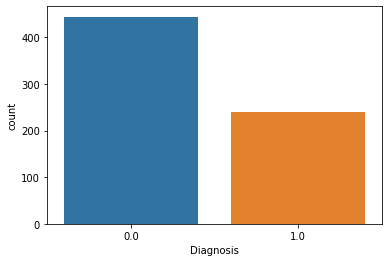

In [14]:
# Visualize the previous count
sns.countplot(df['Diagnosis'], label='count')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_number          683 non-null    int64  
 1   Thickness          683 non-null    int64  
 2   Cell Size          683 non-null    int64  
 3   Cell Shape         683 non-null    int64  
 4   Marginal Adhesion  683 non-null    int64  
 5   Epithelial Size    683 non-null    int64  
 6   Bare Nuclei        683 non-null    object 
 7   Bland Chromatin    683 non-null    int64  
 8   Normal Nucleoli    683 non-null    int64  
 9   Mitoses            683 non-null    int64  
 10  Diagnosis          683 non-null    float64
dtypes: float64(1), int64(9), object(1)
memory usage: 84.0+ KB


In [16]:
# If needed, we can plot the matrix of correlation
df.iloc[:,1:].corr()

,Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Size,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.553742,0.534066,0.350957,0.714790
Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.755559,0.719346,0.460755,0.820801
Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.668567,0.603121,0.418898,0.706294
Epithelial Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.618128,0.628926,0.480583,0.690958
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.346011,0.433757,1.000000,0.423448
Diagnosis,0.714790,0.820801,0.821891,0.706294,0.690958,0.758228,0.718677,0.423448,1.000000


Application of SVM

In [0]:
# Split the data set into inputs X and output Y
X= df.iloc[:,1:10].values
Y= df.iloc[:,-1].values

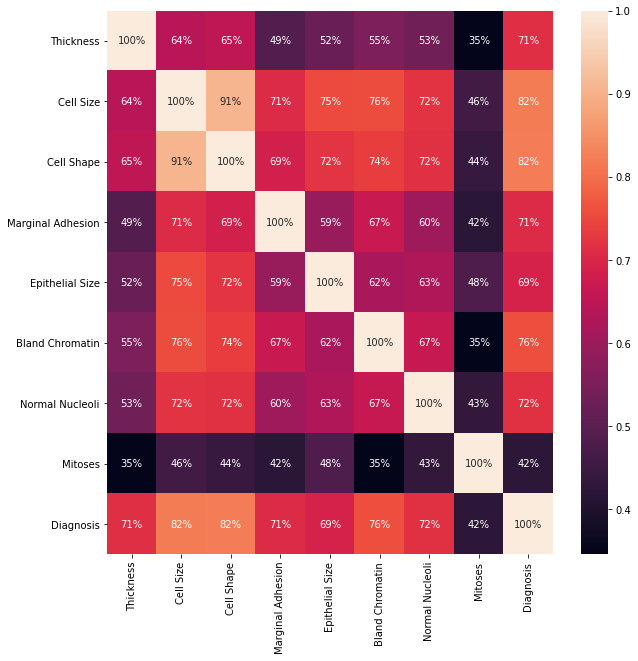

In [18]:
# Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:].corr(), annot=True, fmt='.0%')

In [0]:
# Split the data set into 67% training and 33% test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=0)

In [20]:
# SVM classifier
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5, max_iter=1e5)
clf.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100000.0,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [21]:
# Display how good is SVM model
print('SVM accuracy:', clf.score(X_train,Y_train))

SVM accuracy: 0.9803063457330415


In [22]:
# Display accuracy on the testing data
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(Y_test, clf.predict(X_test)))
print(accuracy_score(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       142
         1.0       0.92      0.94      0.93        84

    accuracy                           0.95       226
   macro avg       0.94      0.95      0.94       226
weighted avg       0.95      0.95      0.95       226

0.9469026548672567


In [23]:
# Print the prediction made with SVM
pred = clf.predict(X_test)
pred

array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1.

In [24]:
# Print the actual values
print(Y_test)

[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.]
